Epoch 10/5000 - loss: 0.9727 - acc: 0.5000
Epoch 20/5000 - loss: 1.0041 - acc: 0.5000
Epoch 30/5000 - loss: 1.0545 - acc: 0.5000
Epoch 40/5000 - loss: 1.1144 - acc: 0.5000
Epoch 50/5000 - loss: 1.1797 - acc: 0.5000
Epoch 60/5000 - loss: 1.2453 - acc: 0.5000
Epoch 70/5000 - loss: 1.3062 - acc: 0.5000
Epoch 80/5000 - loss: 1.3589 - acc: 0.5000
Epoch 90/5000 - loss: 1.4025 - acc: 0.5000
Epoch 100/5000 - loss: 1.4382 - acc: 0.5000
Epoch 110/5000 - loss: 1.4676 - acc: 0.5000
Epoch 120/5000 - loss: 1.4922 - acc: 0.5000
Epoch 130/5000 - loss: 1.5132 - acc: 0.5000
Epoch 140/5000 - loss: 1.5313 - acc: 0.5000
Epoch 150/5000 - loss: 1.5472 - acc: 0.5000
Epoch 160/5000 - loss: 1.5612 - acc: 0.5000
Epoch 170/5000 - loss: 1.5735 - acc: 0.5000
Epoch 180/5000 - loss: 1.5845 - acc: 0.5000
Epoch 190/5000 - loss: 1.5941 - acc: 0.5000
Epoch 200/5000 - loss: 1.6026 - acc: 0.5000
Epoch 210/5000 - loss: 1.6101 - acc: 0.5000
Epoch 220/5000 - loss: 1.6166 - acc: 0.5000
Epoch 230/5000 - loss: 1.6223 - acc: 0.50

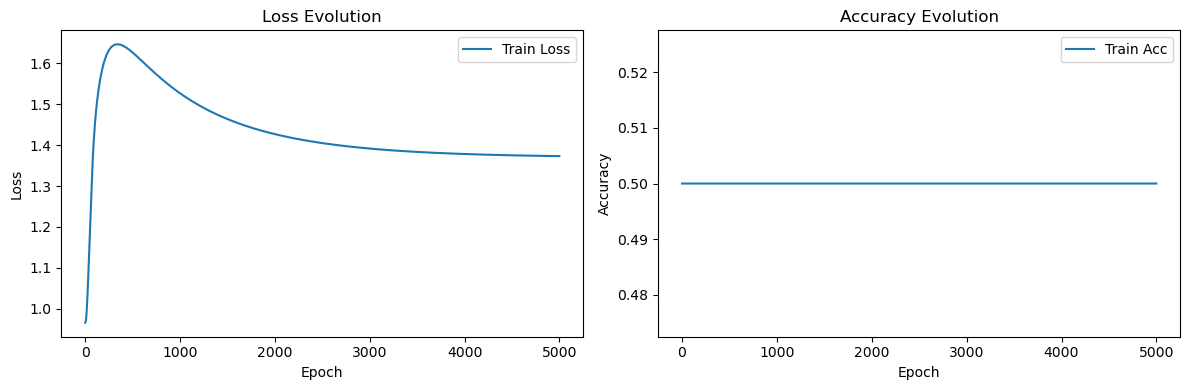

In [ ]:
import sys
sys.path.append('../')

import numpy as np
from src.neural_network import NeuralNetwork
from src.optimizers import Adam
from src.trainer import Trainer
from src.utils import one_hot_encode

# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0, 1, 1, 0])
y_oh = one_hot_encode(y, num_classes=2)

# Crear red: 2 inputs -> 4 hidden (sigmoid) -> 2 output (softmax)
# XOR es no-lineal, necesita capa oculta con más capacidad
architecture = [
    (2, None),
    (8, 'sigmoid'),
    (2, 'softmax')
]

optimizer = Adam(learning_rate=0.05)
model = NeuralNetwork(architecture, loss='categorical_crossentropy')
trainer = Trainer(model, optimizer)

# Entrenar
trainer.train(X, y_oh, epochs=10000, batch_size=4, verbose=True)

# Evaluar
y_pred = model.forward(X)
print("\nPredicciones finales:")
print(np.argmax(y_pred, axis=1))
print("Etiquetas verdaderas:")
print(y)

# Graficar
trainer.plot_history()